# Data Preprocessing and Visualisation

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [0]:
import sklearn
import random

from sklearn.utils import shuffle
%matplotlib inline

In [0]:

from zipfile import ZipFile
with ZipFile('creditcardfraud.zip','r') as zip:
  zip.printdir()
  zip.extractall()

File Name                                             Modified             Size
creditcard.csv                                 2019-09-20 00:04:46    150828752


In [0]:
d=pd.read_csv('creditcard.csv')

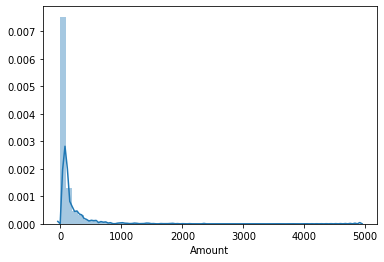

In [0]:
sns.distplot(data['Amount'])

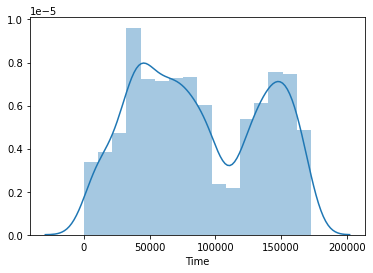

In [0]:
sns.distplot(data['Time'])

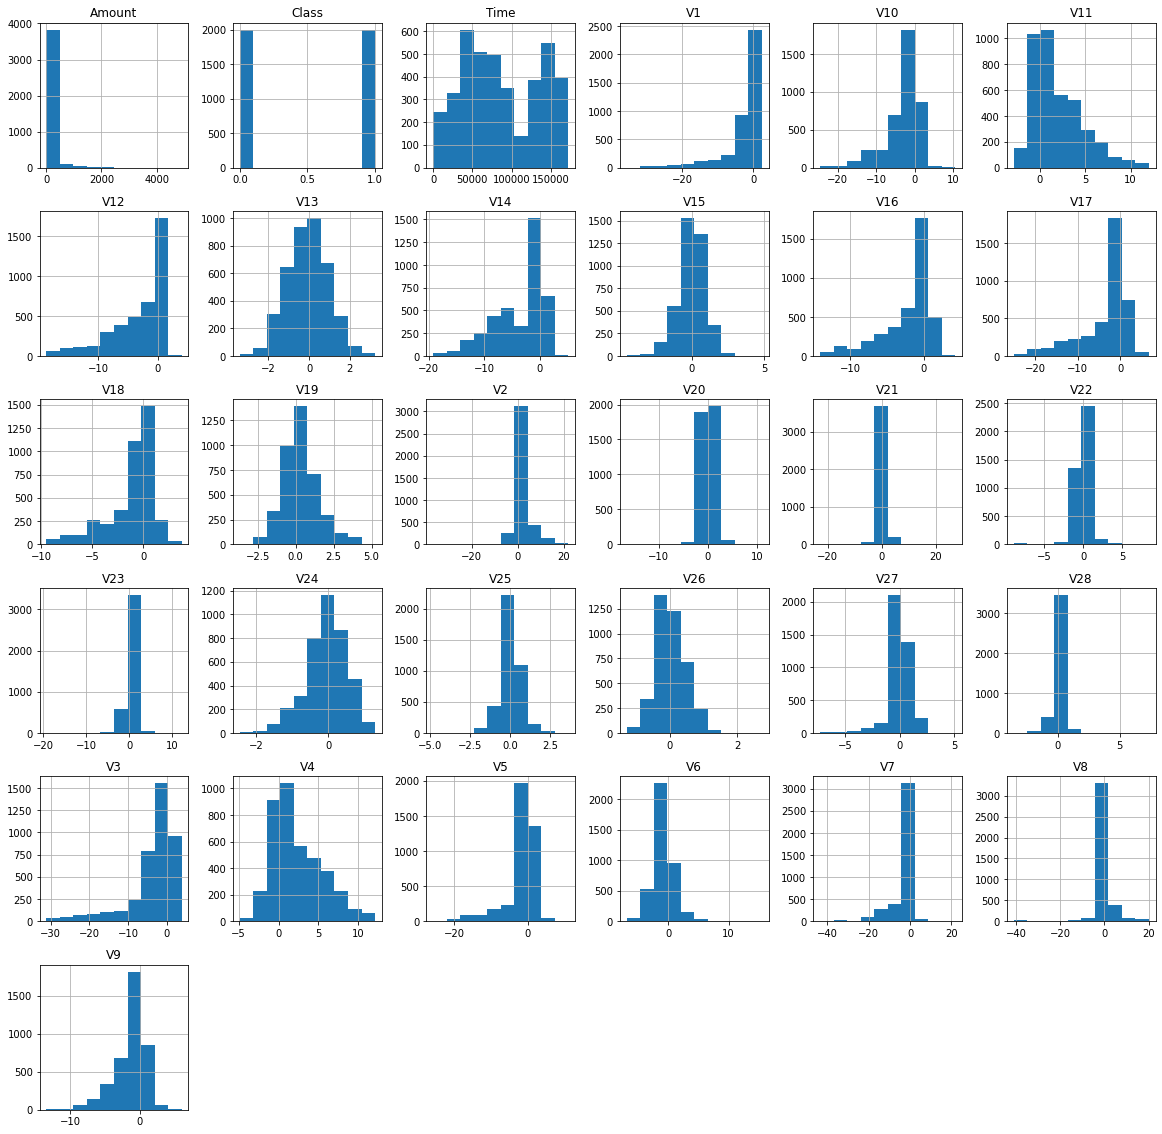

In [0]:
data.hist(figsize=(20,20))
plt.show()

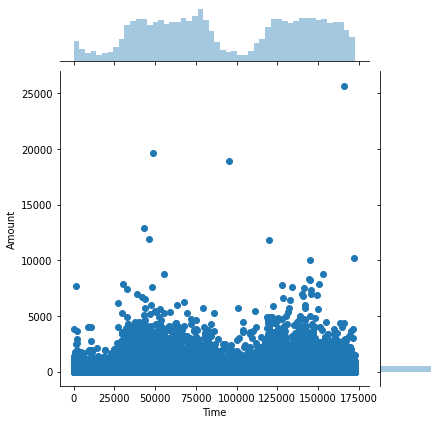

In [0]:
sns.jointplot(x= 'Time', y= 'Amount', data= d)

In [0]:
class0 = d[d['Class']==0]

In [0]:
len(class0)

284315

In [0]:
class1 = d[d['Class']==1]

In [0]:
len(class1)

492

In [0]:
class0
temp = shuffle(class0)

In [0]:
d1 = temp.iloc[:2000,:]

In [0]:
d1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8451,11339.0,1.115482,0.483779,1.061985,2.849450,-0.138006,0.310514,-0.240062,0.077572,1.063138,0.121160,0.212878,-2.455544,1.117574,1.434231,-1.074953,-0.025990,0.793325,-0.805304,-1.139544,-0.274640,-0.418388,-0.830334,0.132148,-0.035525,0.266677,-0.186722,-0.003652,0.015633,3.78,0
161999,114736.0,0.127226,0.075618,0.031252,-1.262191,-0.263403,-1.074323,0.221942,-0.176423,-0.750447,-0.162783,-0.523345,-1.290299,-0.707244,-1.433724,0.062570,1.262653,1.317532,-1.189221,0.859617,-0.005261,-0.222665,-0.740481,0.326748,-0.191581,-1.220402,-0.735020,0.047332,0.134559,54.00,0
134685,80916.0,1.312571,-0.023678,-0.067752,-0.000391,0.129098,0.203582,-0.150059,0.060038,0.255824,-0.063149,0.005438,0.656168,0.170068,0.160514,-0.306781,0.488619,-0.822271,0.244668,1.033898,-0.048503,-0.285338,-0.731287,-0.116923,-0.997773,0.478315,0.512583,-0.048484,-0.013506,4.00,0
157396,109854.0,2.070473,-0.037229,-1.480230,0.181227,0.460205,-0.331415,-0.096331,-0.153453,1.933076,-0.275568,1.384437,-2.111007,0.846400,2.247918,-0.414716,0.064154,-0.173718,1.121239,0.066616,-0.299058,0.128349,0.690177,-0.028970,0.219960,0.326893,-0.481370,-0.032986,-0.069556,1.00,0
97278,66140.0,-1.290198,1.568413,0.294731,-0.075453,-0.607799,-0.647465,-0.258212,1.071541,-0.470587,-0.422342,0.578339,-0.239783,-1.800681,0.711218,0.378484,0.995561,0.081445,0.770591,0.296022,-0.089247,-0.204372,-0.849549,0.064328,-0.107073,-0.118589,0.090962,0.093585,0.003121,9.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11359,19808.0,-0.279594,0.972029,-0.159522,-0.912120,2.618104,3.316440,0.024449,0.854213,0.781067,-0.816153,0.937201,-2.839385,1.560507,1.176197,0.360282,0.686264,0.249801,0.597408,0.079412,0.181242,-0.470178,-1.192220,-0.040785,0.874641,-0.030134,0.049483,0.220851,0.084572,1.78,0
83010,59652.0,1.326090,-0.907686,1.079518,-0.614340,-1.504667,0.075941,-1.326046,0.258336,-0.079256,0.640729,0.588011,-0.257769,-0.786289,-0.452638,-0.658641,1.356170,0.152658,-0.580078,1.101497,0.026256,0.137540,0.427262,-0.056256,0.004253,0.342668,-0.190114,0.043491,0.011805,10.20,0
138141,82502.0,1.151454,-0.062304,1.277136,1.348386,-1.021316,-0.214965,-0.586207,0.112784,0.954215,-0.189861,-0.863385,0.263214,-0.376848,-0.277758,0.222969,0.097947,-0.225594,-0.011369,-0.207543,-0.159486,-0.066923,-0.007000,-0.000992,0.366527,0.401050,-0.407043,0.069757,0.037394,9.99,0
118620,75149.0,-1.714281,-0.471083,1.037722,-1.147281,-0.959848,-0.317952,-1.433817,1.091030,-0.857674,-0.365756,-0.659431,0.357431,0.246475,0.174379,0.207232,-1.522059,0.788861,0.363205,-2.200725,-0.846349,0.065556,0.463471,-0.051837,0.167483,-1.131474,0.916553,-0.074856,-0.156860,13.78,0


In [0]:
frames = [d1, class1]
df_temp = pd.concat(frames)

In [0]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 8451 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    2492 non-null   float64
 1   V1      2492 non-null   float64
 2   V2      2492 non-null   float64
 3   V3      2492 non-null   float64
 4   V4      2492 non-null   float64
 5   V5      2492 non-null   float64
 6   V6      2492 non-null   float64
 7   V7      2492 non-null   float64
 8   V8      2492 non-null   float64
 9   V9      2492 non-null   float64
 10  V10     2492 non-null   float64
 11  V11     2492 non-null   float64
 12  V12     2492 non-null   float64
 13  V13     2492 non-null   float64
 14  V14     2492 non-null   float64
 15  V15     2492 non-null   float64
 16  V16     2492 non-null   float64
 17  V17     2492 non-null   float64
 18  V18     2492 non-null   float64
 19  V19     2492 non-null   float64
 20  V20     2492 non-null   float64
 21  V21     2492 non-null   float64


In [0]:
df= shuffle(df_temp)

In [0]:
df.to_csv('creditcardsampling.csv')

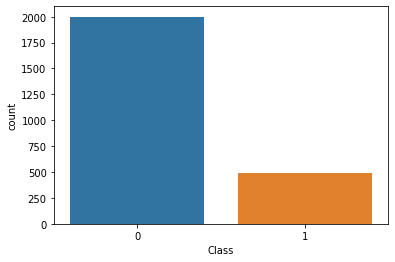

In [0]:
sns.countplot('Class', data=df)

# SMOTE

In [0]:
!pip install --user imblearn

In [0]:
import imblearn

In [0]:
from imblearn.over_sampling import  SMOTE
oversample=SMOTE()
X=df.iloc[ : ,:-1]
Y=df.iloc[: , -1]
X,Y=oversample.fit_resample(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:

X=pd.DataFrame(X)
X.shape



(4000, 30)

In [0]:
Y=pd.DataFrame(Y)
Y.head()

,0
0,0
1,0
2,0
3,0
4,1


In [0]:
names=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class']

In [0]:
data=pd.concat([X,Y],axis=1)

In [0]:
d=data.values

In [0]:
data=pd.DataFrame(d,columns=names)


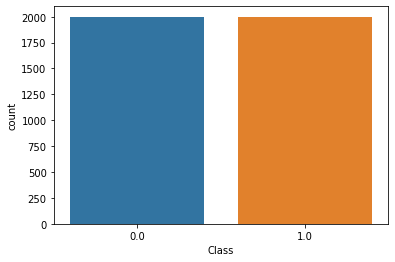

In [0]:
sns.countplot('Class', data=data)

In [0]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,87212.644885,-2.446124,1.876290,-3.616492,2.343523,-1.601473,-0.743352,-2.817266,0.347566,-1.285824,-2.851912,1.946409,-3.209798,-0.031508,-3.564922,-0.022075,-2.121398,-3.394246,-1.141033,0.358734,0.197341,0.393245,0.001280,0.017498,-0.047830,0.028468,0.031613,0.096873,0.044064,99.897410,0.500000
std,48127.828073,5.447716,3.645604,6.121762,3.159898,4.146923,1.705007,5.660216,4.849446,2.260869,4.421488,2.738542,4.552969,1.022057,4.592729,0.923122,3.382771,5.796700,2.329175,1.203765,1.051276,2.738196,1.136441,0.995793,0.543978,0.630701,0.444569,0.913971,0.404050,247.579142,0.500063
min,7.000000,-30.552380,-25.313252,-31.103685,-4.449606,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-4.009307,-18.683715,-3.214555,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-8.461484,-22.797604,-8.887017,-19.254328,-2.337548,-4.781606,-1.488437,-7.263482,-3.492635,0.000000,0.000000
25%,44544.751045,-3.057579,-0.068135,-5.176036,-0.009297,-1.851451,-1.582113,-3.194086,-0.201726,-2.310133,-4.636136,-0.104405,-5.564619,-0.757815,-6.844834,-0.539240,-3.546421,-5.497158,-1.819156,-0.379389,-0.182410,-0.163608,-0.499704,-0.222991,-0.382134,-0.307115,-0.263536,-0.063330,-0.057920,2.542914,0.000000
50%,79033.137111,-0.818675,0.996948,-1.561348,1.441768,-0.444602,-0.686769,-0.700747,0.146075,-0.749472,-0.976273,1.166084,-1.091165,-0.029680,-1.251447,0.010387,-0.736644,-0.627476,-0.399487,0.240433,0.040139,0.155620,0.045817,-0.024571,-0.000801,0.045050,0.002045,0.060482,0.037088,23.212671,0.500000
75%,134771.203927,0.889980,2.900701,0.253532,4.390489,0.450522,0.007348,0.223960,0.864175,0.104273,-0.015111,3.586846,0.160197,0.662734,0.083950,0.611772,0.197747,0.165642,0.316244,0.967015,0.470401,0.657709,0.531482,0.203673,0.359314,0.379362,0.314515,0.460631,0.226111,99.990000,1.000000
max,172694.000000,2.379970,22.057729,3.550661,12.114672,11.095089,6.474115,10.941461,20.007208,6.810353,9.767748,12.018913,3.621891,3.398836,5.124572,3.378716,3.373584,6.739384,4.027806,5.228342,15.815051,27.202839,8.361985,6.116419,2.971582,2.208209,3.463246,3.307712,2.893744,7879.420000,1.000000


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    4000 non-null   float64
 1   V1      4000 non-null   float64
 2   V2      4000 non-null   float64
 3   V3      4000 non-null   float64
 4   V4      4000 non-null   float64
 5   V5      4000 non-null   float64
 6   V6      4000 non-null   float64
 7   V7      4000 non-null   float64
 8   V8      4000 non-null   float64
 9   V9      4000 non-null   float64
 10  V10     4000 non-null   float64
 11  V11     4000 non-null   float64
 12  V12     4000 non-null   float64
 13  V13     4000 non-null   float64
 14  V14     4000 non-null   float64
 15  V15     4000 non-null   float64
 16  V16     4000 non-null   float64
 17  V17     4000 non-null   float64
 18  V18     4000 non-null   float64
 19  V19     4000 non-null   float64
 20  V20     4000 non-null   float64
 21  V21     4000 non-null   float64
 22  

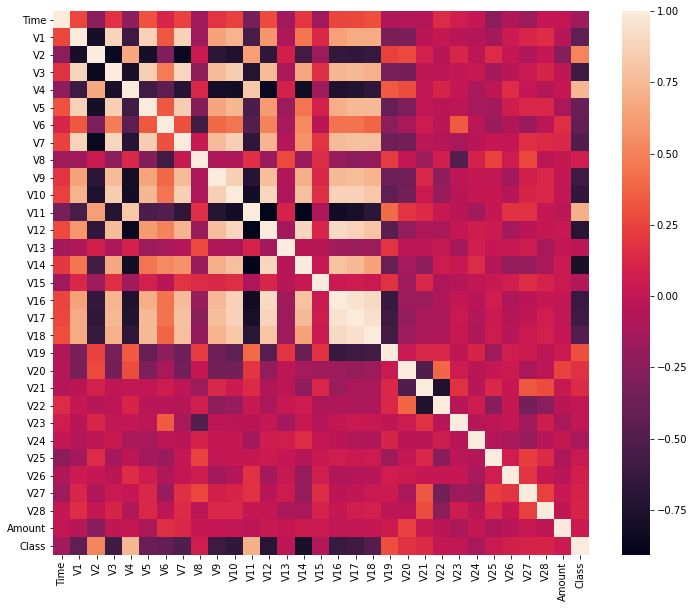

In [0]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr())

In [0]:
!pip install --user lightgbm

In [0]:
!pip install --user utils

In [0]:

import math
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, precision_recall_curve, f1_score, auc

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data['Class'], test_size=0.3, random_state=42)

# Feature Scaling

In [0]:

cols= ['V22', 'V24', 'V25', 'V26', 'V27', 'V28']

In [0]:
scaler = StandardScaler()

In [0]:
frames= ['Time', 'Amount']

In [0]:
x= data[frames]

In [0]:
d_temp = data.drop(frames, axis=1)

In [0]:
temp_col=scaler.fit_transform(x)

In [0]:
scaled_col = pd.DataFrame(temp_col, columns=frames)

In [0]:
scaled_col.head()

,Time,Amount
0,-0.082055,-0.364282
1,0.778885,-0.399508
2,-0.847903,-0.399508
3,1.209023,-0.326997
4,-0.568820,-0.379673


In [0]:
d_scaled = pd.concat([scaled_col, d_temp], axis =1)

In [0]:
d_scaled.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.082055,-0.364282,-1.032537,1.406303,1.113140,-0.290217,0.246122,-0.213437,0.691903,0.040329,0.113321,0.758728,1.808662,0.451256,-0.348651,-0.558053,0.560967,0.160635,-0.077302,-0.125709,-0.242565,0.520983,-0.333574,-0.530626,0.006364,-0.053792,-0.143371,0.070952,0.404989,0.062741,0.0
1,0.778885,-0.399508,0.144705,0.468879,-1.300628,-1.737176,3.039958,3.298205,0.359588,0.820667,-0.203395,-0.647636,-0.162409,-0.082045,-0.289776,0.557775,0.760909,-0.224677,-0.716602,0.004761,-0.575134,-0.132461,0.332529,0.928094,-0.240038,0.731974,0.030375,-0.155818,0.076898,0.031374,0.0
2,-0.847903,-0.399508,-4.462202,2.628672,-3.456644,0.987951,-1.806298,-0.758736,-1.712637,3.090154,-0.613603,0.599818,0.057842,1.366149,-0.480545,2.721689,0.256604,0.319761,0.936073,0.310085,0.198608,0.034931,0.288349,0.339270,-0.112326,-0.302590,-0.450957,-0.368893,0.218848,0.016964,0.0
3,1.209023,-0.326997,0.280221,0.602765,-0.279654,-0.525408,0.970241,0.032587,0.861547,-0.154476,0.072205,-0.520856,-1.844234,0.335346,1.055813,-0.294437,-0.913451,-0.443982,-0.390890,-0.204213,0.742500,-0.003286,0.202523,0.875473,-0.073611,0.146515,-0.994536,0.611554,0.225810,0.263597,0.0
4,-0.568820,-0.379673,-3.215382,-0.364223,-1.261883,3.794949,0.711206,-1.316476,-5.165141,0.625278,-1.582301,-3.252634,5.040751,-5.314442,-0.656471,-6.233044,0.974771,-6.890318,-9.516411,-4.364128,2.598578,0.019626,0.401341,0.152191,-0.934675,-0.256148,-0.469403,-0.282496,0.866077,-0.433466,1.0


In [0]:

y = data['Class']

In [0]:
d_scaled.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.082055,-0.364282,-1.032537,1.406303,1.113140,-0.290217,0.246122,-0.213437,0.691903,0.040329,0.113321,0.758728,1.808662,0.451256,-0.348651,-0.558053,0.560967,0.160635,-0.077302,-0.125709,-0.242565,0.520983,-0.333574,-0.530626,0.006364,-0.053792,-0.143371,0.070952,0.404989,0.062741,0.0
1,0.778885,-0.399508,0.144705,0.468879,-1.300628,-1.737176,3.039958,3.298205,0.359588,0.820667,-0.203395,-0.647636,-0.162409,-0.082045,-0.289776,0.557775,0.760909,-0.224677,-0.716602,0.004761,-0.575134,-0.132461,0.332529,0.928094,-0.240038,0.731974,0.030375,-0.155818,0.076898,0.031374,0.0
2,-0.847903,-0.399508,-4.462202,2.628672,-3.456644,0.987951,-1.806298,-0.758736,-1.712637,3.090154,-0.613603,0.599818,0.057842,1.366149,-0.480545,2.721689,0.256604,0.319761,0.936073,0.310085,0.198608,0.034931,0.288349,0.339270,-0.112326,-0.302590,-0.450957,-0.368893,0.218848,0.016964,0.0
3,1.209023,-0.326997,0.280221,0.602765,-0.279654,-0.525408,0.970241,0.032587,0.861547,-0.154476,0.072205,-0.520856,-1.844234,0.335346,1.055813,-0.294437,-0.913451,-0.443982,-0.390890,-0.204213,0.742500,-0.003286,0.202523,0.875473,-0.073611,0.146515,-0.994536,0.611554,0.225810,0.263597,0.0
4,-0.568820,-0.379673,-3.215382,-0.364223,-1.261883,3.794949,0.711206,-1.316476,-5.165141,0.625278,-1.582301,-3.252634,5.040751,-5.314442,-0.656471,-6.233044,0.974771,-6.890318,-9.516411,-4.364128,2.598578,0.019626,0.401341,0.152191,-0.934675,-0.256148,-0.469403,-0.282496,0.866077,-0.433466,1.0


# Dimensionality Reduction

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=7)

In [0]:
X_temp_reduced = pca.fit_transform(d_scaled)

In [0]:
pca.explained_variance_ratio_

array([0.67983253, 0.09337765, 0.08120807, 0.03418402, 0.03188372,
       0.01152236, 0.00811448])

In [0]:
pca.explained_variance_

array([210.00962649,  28.84564038,  25.08628975,  10.55991429,
         9.84931982,   3.55941644,   2.50667597])

In [0]:
names=['Time','Amount','Transaction Method','Transaction Id','Location','Type of Card','Bank']

In [0]:
X_reduced= pd.DataFrame(X_temp_reduced,columns=names)
X_reduced.head()

,Time,Amount,Transaction Method,Transaction Id,Location,Type of Card,Bank
0,-9.565601,0.987092,-1.305426,-0.507697,-0.395777,-0.430083,-1.329865
1,-9.888900,0.919927,-1.170721,-1.097702,0.402458,-0.479574,-0.552516
2,-6.187739,4.237173,-7.330661,0.454354,-1.040217,-0.341298,-0.965172
3,-9.855690,0.928119,-1.039619,-1.221670,0.471779,-0.674401,-0.070604
4,5.095010,-4.995467,3.972092,-5.011047,0.843109,2.941301,-3.511102


In [0]:
Y=d_scaled['Class']

In [0]:
new_data=pd.concat([X_reduced,Y],axis=1)
new_data.head()
new_data.shape

(4000, 8)

In [0]:
new_data.to_csv('finaldata.csv')

In [0]:
X_train, X_test, y_train, y_test= train_test_split(X_reduced, d_scaled['Class'], test_size = 0.30, random_state = 42)

In [0]:
X_train.shape, X_test.shape

((2800, 7), (1200, 7))

# Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
y_pred_lr

array([1., 1., 0., ..., 0., 1., 1.])

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred_lr))

[[617   8]
 [ 28 547]]


In [0]:
#Hyperparamter tuning 
from sklearn.model_selection import GridSearchCV
lr_model = LogisticRegression()
lr_params = {'penalty': ['l1', 'l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_lr= GridSearchCV(lr_model, param_grid = lr_params)
grid_lr.fit(X_train, y_train)

grid_lr.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

{'C': 10, 'penalty': 'l2'}

In [0]:
y_pred_lr3=grid_lr.predict(X_test)
print(classification_report(y_test,y_pred_lr3))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       625
         1.0       0.99      0.95      0.97       575

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



# Support Vector Machine

In [0]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
y_pred_svc

array([1., 1., 0., ..., 0., 1., 1.])

In [0]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       625
         1.0       0.99      0.93      0.96       575

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



In [0]:
print(confusion_matrix(y_test,y_pred_svc))

[[618   7]
 [ 40 535]]


In [0]:
from sklearn.model_selection import GridSearchCV
parameters = [ {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 1, 0.01, 0.0001 ,0.001]}]
grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 97.25 %
Best Parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [0]:
svc_param=SVC(kernel='rbf',gamma=0.01,C=100)
svc_param.fit(X_train,y_train)
y_pred_svc2=svc_param.predict(X_test)
print(classification_report(y_test,y_pred_svc2))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       625
         1.0       0.98      0.95      0.97       575

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



# Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred_dtree=dtree.predict(X_test)
print(classification_report(y_test,y_pred_dtree))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       625
         1.0       0.94      0.94      0.94       575

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



In [0]:
print(confusion_matrix(y_test,y_pred_dtree))

[[590  35]
 [ 34 541]]


In [0]:
d_tree_param=DecisionTreeClassifier()
tree_parameters={'criterion':['gini','entropy'],'max_depth':list(range(2,4,1)),
                 'min_samples_leaf':list(range(5,7,1))}
grid_tree=GridSearchCV(d_tree_param,tree_parameters)
grid_tree.fit(X_train,y_train) 

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2,

In [0]:
y_pred_dtree2=grid_tree.predict(X_test)

In [0]:
print(classification_report(y_test,y_pred_dtree2))

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95       625
         1.0       0.94      0.97      0.95       575

    accuracy                           0.95      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.95      0.95      0.95      1200



# Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(n_estimators=5)
randomforest.fit(X_train,y_train)
y_pred_rf=randomforest.predict(X_test)
print(confusion_matrix(y_test,y_pred_rf))

[[606  19]
 [ 23 552]]


In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       625
         1.0       0.97      0.96      0.96       575

    accuracy                           0.96      1200
   macro avg       0.97      0.96      0.96      1200
weighted avg       0.97      0.96      0.96      1200



# K Nearest Neighbors

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
y_pred_knn

array([1., 1., 0., ..., 0., 1., 1.])

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       625
         1.0       0.98      0.96      0.97       575

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



In [0]:
print(confusion_matrix(y_test,y_pred_knn))

[[615  10]
 [ 25 550]]


In [0]:
knn_param=KNeighborsClassifier()
knn_params={"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn=GridSearchCV(knn_param,param_grid=knn_params)
grid_knn.fit(X_train,y_train)
grid_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 2}

In [0]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train,y_train)
pred_knn2 = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred_knn2))
print('\n')
print(classification_report(y_test,pred_knn2))

WITH K=3


[[614  11]
 [ 29 546]]


              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       625
         1.0       0.98      0.95      0.96       575

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



# XGBoost

In [0]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xg=xgb.predict(X_test)
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       625
         1.0       0.97      0.97      0.97       575

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



# LGB

In [0]:
import lightgbm as lgb

In [0]:
lgb_train = lgb.Dataset(X_train, y_train, free_raw_data= False)

In [0]:
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train, free_raw_data= False)

In [0]:
parameters = {'num_leaves': 2**8,
              'learning_rate': 0.1,
              'is_unbalance': True,
              'min_split_gain': 0.1,
              'min_child_weight': 1,
              'reg_lambda': 1,
              'subsample': 1,
              'objective':'binary',
              #'device': 'gpu', # comment this line if you are not using GPU
              'task': 'train'
              }
num_rounds = 300

In [0]:
lgb_train = lgb.Dataset(X_train, y_train)

In [0]:
lgb_test = lgb.Dataset(X_test, y_test)

In [0]:
clf = lgb.train(parameters, lgb_train, num_boost_round=num_rounds)

In [0]:
y_prob = clf.predict(X_test)
y_pred = sklearn.preprocessing.binarize(np.reshape(y_prob, (-1,1)), threshold= 0.5)

In [0]:

accuracy_score(y_test, y_pred)

0.9716666666666667

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       625
         1.0       0.98      0.97      0.97       575

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



# ROC

In [0]:
from sklearn.metrics import roc_curve,roc_auc_score
lg_fpr,lg_tpr,lg_threshold=roc_curve(y_test,y_pred_lr3)
svc_fpr,svc_tpr,svc_threshold=roc_curve(y_test,y_pred_svc2)
dtree_fpr,dtree_tpr,dtree_threshold=roc_curve(y_test,y_pred_dtree2)
rf_fpr,rf_tpr,rf_threshold=roc_curve(y_test,y_pred_rf)
knn_fpr,knn_tpr,rf_threshold=roc_curve(y_test,pred_knn2)
xg_fpr,xg_tpr,xg_threshold=roc_curve(y_test,y_pred_xg)
lgb_fpr,lgb_tpr,lgb_threshold=roc_curve(y_test,y_pred)

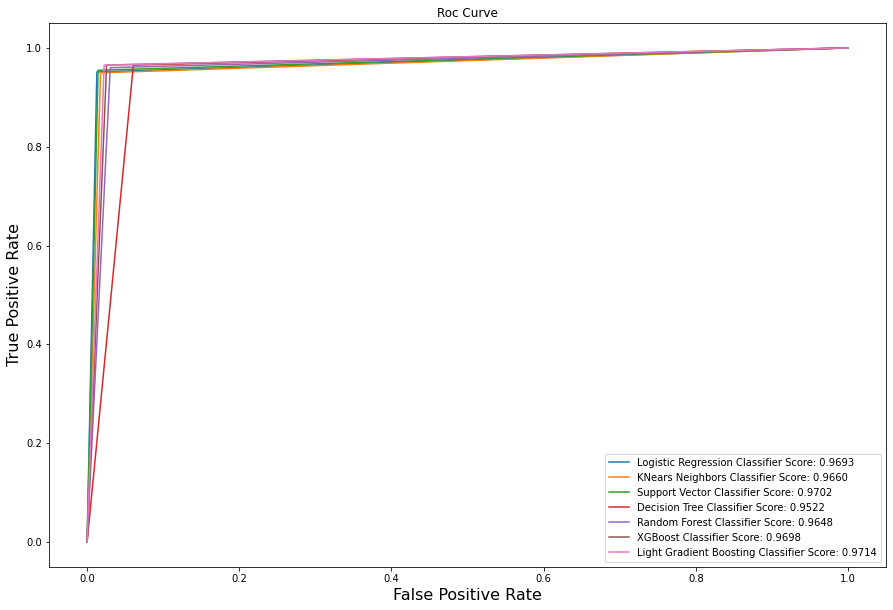

In [0]:
plt.figure(figsize=(15,10))
plt.title("Roc Curve")
plt.plot(lg_fpr,lg_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_lr3)))
plt.plot(knn_fpr,knn_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, pred_knn2)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_svc2)))
plt.plot(dtree_fpr, dtree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_dtree2)))
plt.plot(rf_fpr,rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_rf)))
plt.plot(xg_fpr,xg_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_xg)))
plt.plot(lgb_fpr,lgb_tpr, label='Light Gradient Boosting Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred)))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.show()